In [1]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import win32gui
import keras
from tensorflow.keras.datasets import mnist
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

digits = load_digits()

In [2]:
#Définissons une fonction pour les résultats
def print_confusion_matrix(confusion_matrix,class_names,figsize=(10,7),fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix,index=class_names,columns=class_names,)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm,annot=True,fmt='d')
    except ValueError:
        raise ValueError("Confusion matrix must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha="right",fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha="right",fontsize=fontsize)
    plt.ylabel("Truth")
    plt.xlabel("Prediction")

<p style="font-size:22px;"><strong>Analysons le dataset</strong><br><br></p>

In [3]:
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [4]:
type(digits)

sklearn.utils.Bunch

In [5]:
data = digits.data
target = digits.target

In [6]:
print("""Taille des données: {}
          Taille des classes: {}
          Taille des images: {}""".format(data.shape,target.shape,digits.images.shape))

Taille des données: (1797, 64)
          Taille des classes: (1797,)
          Taille des images: (1797, 8, 8)


In [7]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


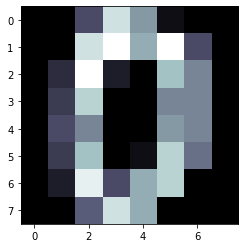

In [8]:
plt.imshow(digits.images[0],cmap=plt.cm.bone)

In [9]:
print(np.unique(target))

[0 1 2 3 4 5 6 7 8 9]


In [10]:
df_img=pd.DataFrame() 

for i in range(64): 
    df_img[f"Pixel{i}"]=digits.images.reshape(1797,64)[:,i] 

In [11]:
df_img

,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,...,Pixel54,Pixel55,Pixel56,Pixel57,Pixel58,Pixel59,Pixel60,Pixel61,Pixel62,Pixel63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [12]:
df_img.isnull().any().any()

False

Nous voyons donc que le dataset est un type sklearn.utils.Bunch qui est essentiellement utilisé pour stocker des jeu de données.<br>
Ce dernier est semblable à un dictionnaire et comprend data, target et images qui correspondent respectivement aux images contenus dans le dataset dans data et à target qui permet d'identifier le chiffre inscrit sur l'image.<br>
Nous voyons également remarquer que les images sont en 2D avec le premier éléments du tuple qui est le nombre d'image et le second qui est le nombre d'attributs/pixels

<strong style="font-size:22px;">Affichons quelques une des images afin d'avoir une idée du jeu</strong><br><br>
<div style="font-size:17px;">Nous allons crééer une fonction qui prend en entrée les images et nous les affiches de même que la valeur qui est dessus</div>

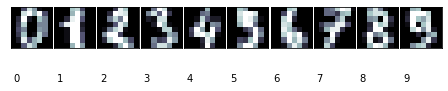

In [13]:
def print_digits(images,y,max_n=10):
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i<max_n and i<images.shape[0]:
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0,14,str(y[i]))
        i =i+1
    
print_digits(digits.images,digits.target,max_n=10)

<p style="font-size:22px;"><strong>ACP pour réduire la dimension à deux, affichage des données dans l'espace de projection et analyse des composantes principales</strong><br><br></p>

<p style="font-size:15px;margin-left:200px;"><strong>ACP ET AFFICHAGE DANS L'ESPACE DE PROJECTION</strong><br><br></p>

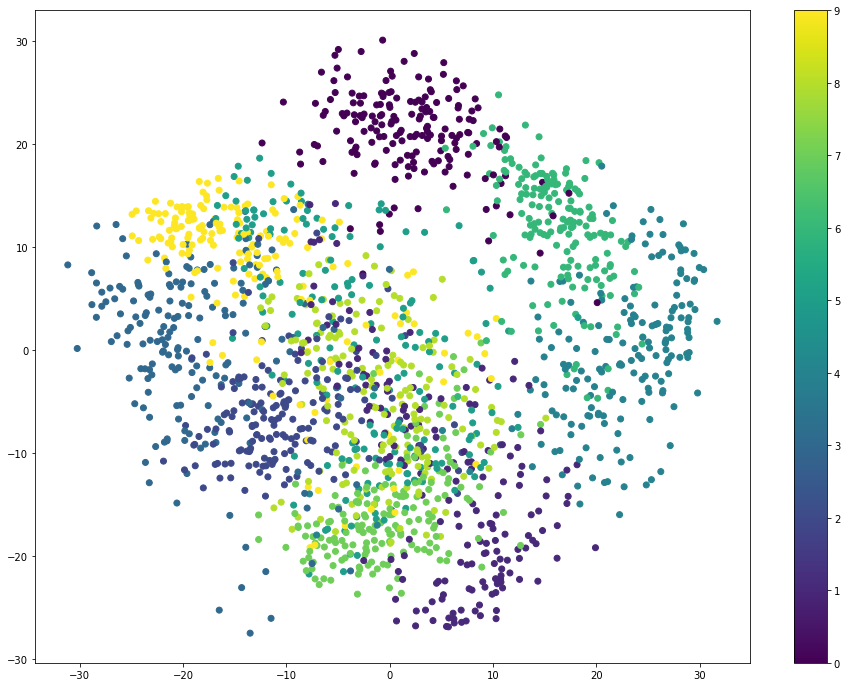

In [14]:
model = PCA(n_components=2)
data_reduced = model.fit_transform(data)
plt.figure(figsize=(16,12))
plt.scatter(data_reduced[:,0],data_reduced[:,1],c=target)
plt.colorbar()
plt.show()

<p style="font-size:15px;margin-left:200px;"><strong>ANALYSE DES COMPOSANTES PRINCIPALES</strong><br><br></p>

In [15]:
model.components_

array([[-3.79775923e-17, -1.73094653e-02, -2.23428840e-01,
        -1.35913290e-01, -3.30322787e-02, -9.66340979e-02,
        -8.32946036e-03,  2.26899746e-03, -3.20516342e-04,
        -1.19308895e-01, -2.44451678e-01,  1.48512750e-01,
        -4.67319059e-02, -2.17740733e-01, -1.48136985e-02,
         4.47779373e-03, -4.94135331e-05, -7.95419230e-02,
         8.33951224e-02,  2.15915327e-01, -1.72126805e-01,
        -1.63712090e-01,  2.86444441e-02,  4.23251855e-03,
         9.85488996e-05,  6.42319256e-02,  2.54093321e-01,
        -3.56771038e-02, -2.09462599e-01, -4.31311430e-02,
         5.13118856e-02,  2.13422749e-04, -0.00000000e+00,
         1.59950883e-01,  3.68690799e-01,  1.64406859e-01,
         8.52007835e-02,  3.72982674e-02,  2.15867063e-02,
        -0.00000000e+00,  1.28865564e-03,  1.06945268e-01,
         3.03067430e-01,  2.47813032e-01,  2.09637293e-01,
         1.22325090e-02, -3.69458435e-02,  1.61485044e-03,
         6.93023375e-04, -8.35145392e-03, -5.58599352e-0

In [16]:
model.explained_variance_ratio_

array([0.14890594, 0.13618771])

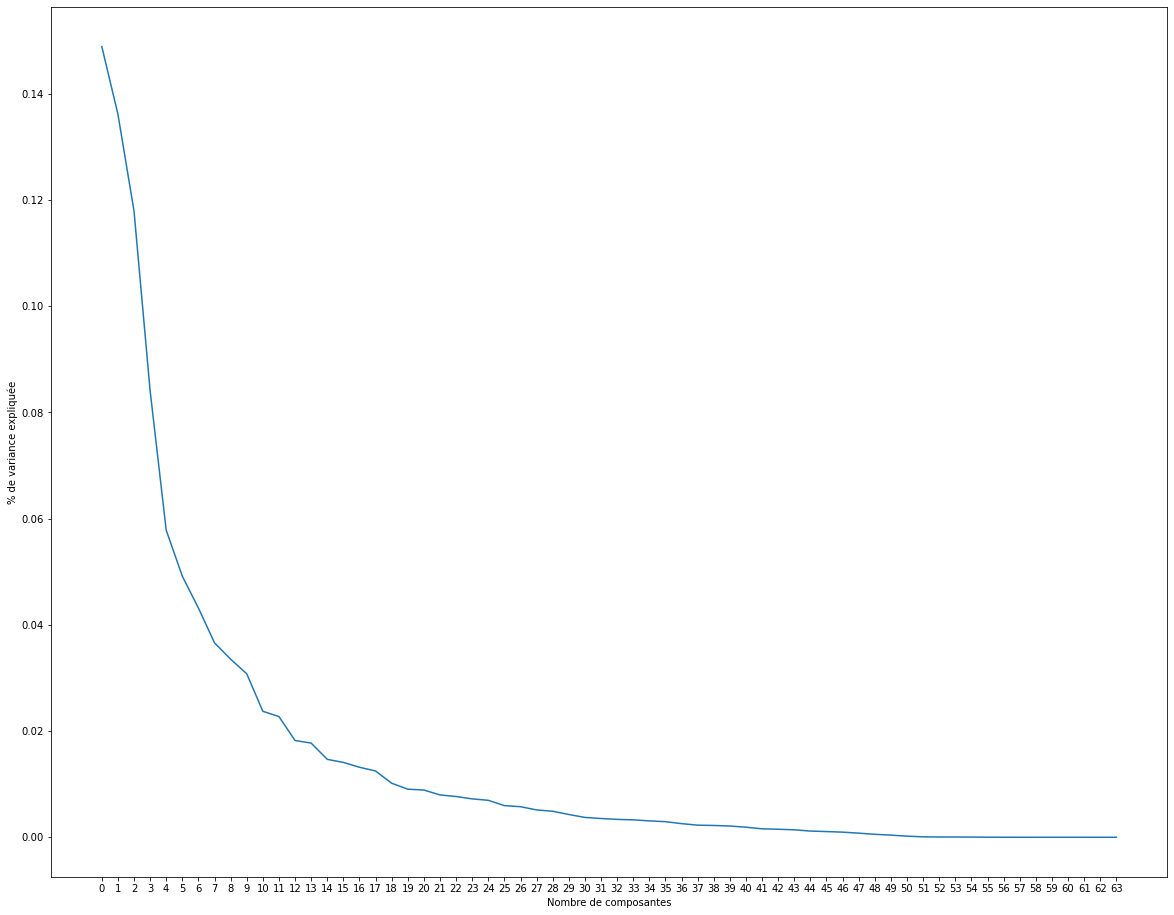

In [17]:
#Determination du nombre de composantes à chercher avec la méthode du coude
model = PCA()
model.fit_transform(data)

ratios = model.explained_variance_ratio_

plt.figure(figsize=(20,16))
plt.xlabel("Nombre de composantes")
plt.ylabel("% de variance expliquée")
plt.xticks(range(len(ratios)))
plt.plot(ratios)
plt.show()

<p style="font-size:22px;"><strong>Prétraitement de données</strong><br><br></p>

<div style="font-weight:bold;font-size:15px;">Nous allons d'abord centrer, réduire et normaliser les images<br></div>

In [18]:
# data_reduced = data_reduced-np.mean(data_reduced)/np.std(data_reduced)

In [19]:
# data_reduced /= 255.0

In [20]:
# print("{} {}".format(data_reduced.max(),data_reduced.min()))

In [21]:
# print(data_reduced)

<p style="font-size:22px;"><strong>Partitionnement avec k-mean, affichage et analyse des clusters</strong><br><br></p>

<p style="font-size:15px;margin-left:200px;"><strong>PARTITIONNEMENT AVEC K-MEAN</strong><br><br></p>

<div style="font-weight:bold;font-size:15px;">Nous allons d'abord commencer par séparer les données en training data ou en testing data et afficher quelques une des images des données test et train.<br></div>

<ul>Les données de digits.images sont des matrices de 3 dimensions cependant la méthode train_test_split prend en donnée des
matrices 2D donc il nous faudra les ramenés en 2D pour pouvoir avoir nos splits<br></ul>

n_digits: 10, 	 n_samples 1437, 	 n_features 2


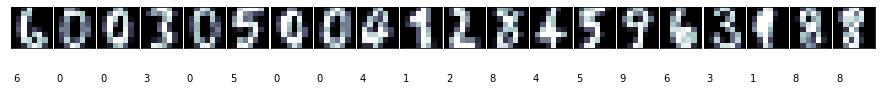

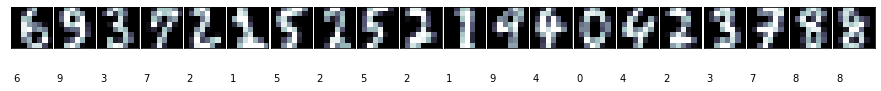

In [22]:
from sklearn.model_selection import train_test_split

number_of_instances=digits.images.shape[0]

X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
        data_reduced,target, digits.images.reshape(number_of_instances,64),test_size=0.2, random_state=42)


n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train

#Reshape images back
images_train=images_train.reshape(images_train.shape[0],8,8)
images_test=images_test.reshape(images_test.shape[0],8,8)


print_digits(images_train, y_train, max_n=20)
print_digits(images_test, y_test, max_n=20)

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

In [23]:
print(X_train.shape)

(1437, 2)


<div style="font-weight:bold;font-size:15px;">Clustering<br></div>

<p style="font-size:15px;margin-left:200px;"><strong>Determination du nombre de clusters avec la méthode du coude</strong><br><br></p>

In [24]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler() 
df_img_scaled=scaler.fit_transform(df_img)

In [25]:
from sklearn.cluster import KMeans 
elbow={"inertia":[],"clusters":[]}

for i in range(2,15): 
    model_1=KMeans(i) 
    elbow["clusters"].append(i) 
    model_1.fit(df_img_scaled) 
    elbow["inertia"].append(model_1.inertia_)

Text(0.5, 1.0, 'Elbow Graph')

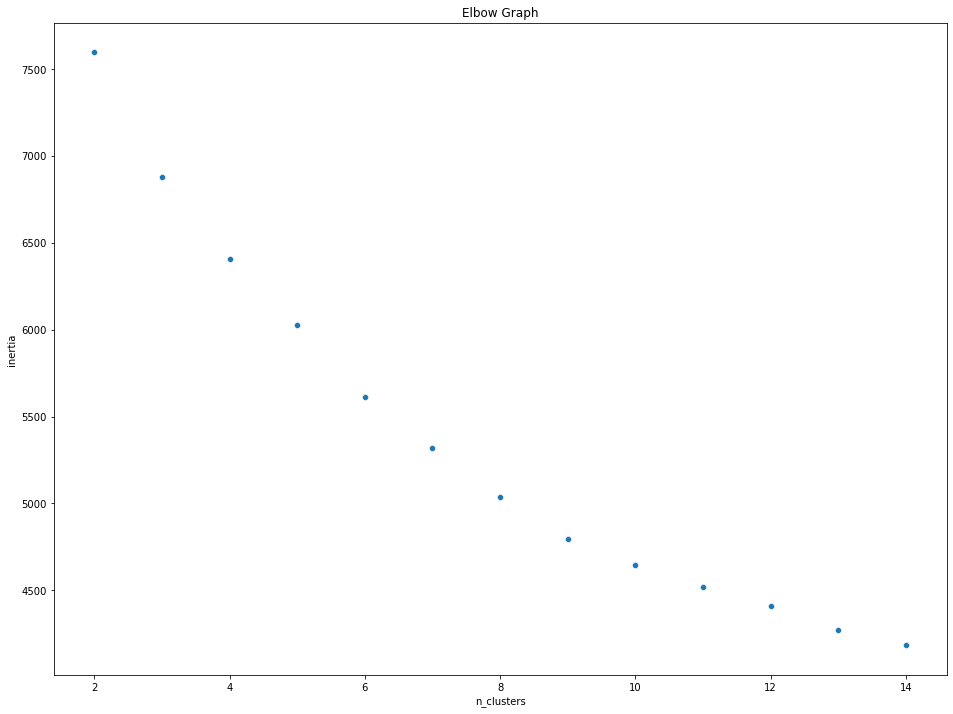

In [26]:
plt.figure(figsize=(16,12))
sns.scatterplot(x=elbow["clusters"],y=elbow["inertia"]) 
plt.xlabel("n_clusters") 
plt.ylabel("inertia") 
plt.title("Elbow Graph")

<p style="font-size:15px;margin-left:200px;"><strong>Applications du clustering aux données</strong><br><br></p>

In [27]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42,n_init=10, max_iter=300,)
clf.fit(X_train)
y_pred = clf.predict(X_test)

<p style="font-size:15px;margin-left:200px;"><strong>AFFICHAGE DES CLUSTERS</strong><br><br></p>

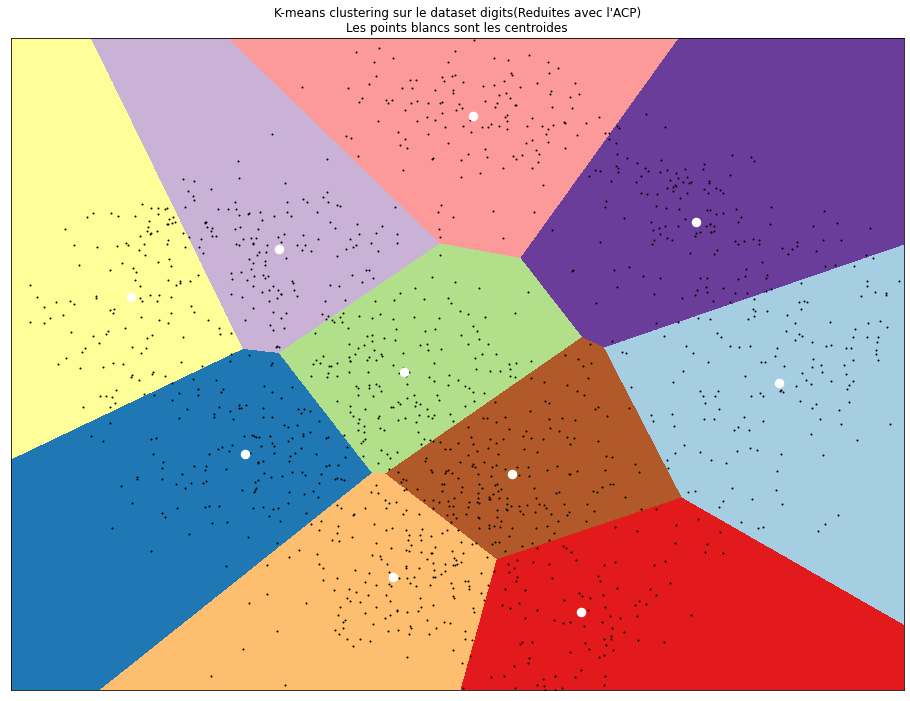

In [28]:
from sklearn import metrics
h = .01

x_min, x_max = X_train[:, 0].min() + 1, X_train[:, 0].max() - 1
y_min, y_max = X_train[:, 1].min() + 1, X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

kmeans = cluster.KMeans(init="k-means++", n_clusters=n_digits)
kmeans.fit(X_train)


Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,12))
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')
plt.plot(X_train[:, 0], X_train[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)
plt.title('K-means clustering sur le dataset digits(Reduites avec l\'ACP)\n'
         'Les points blancs sont les centroides')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# centroids = clf.cluster_centers_
# plt.figure(figsize=(16,12))
# plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train)
# plt.scatter(centroids[:,0],centroids[:,1],color='r')
# plt.colorbar()
# plt.show()

Cluster 0
50 elements


<ipython-input-29-33290629a59d>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(r+1,10,k+1)


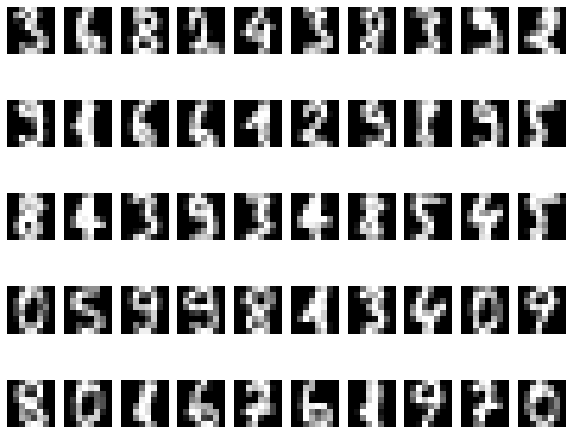

Cluster 1
41 elements


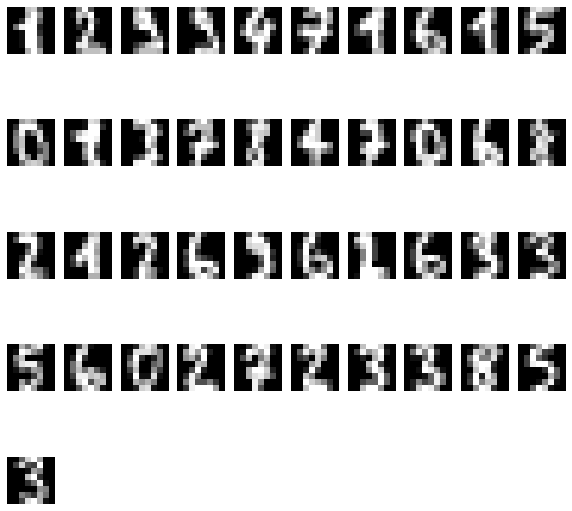

Cluster 2
38 elements


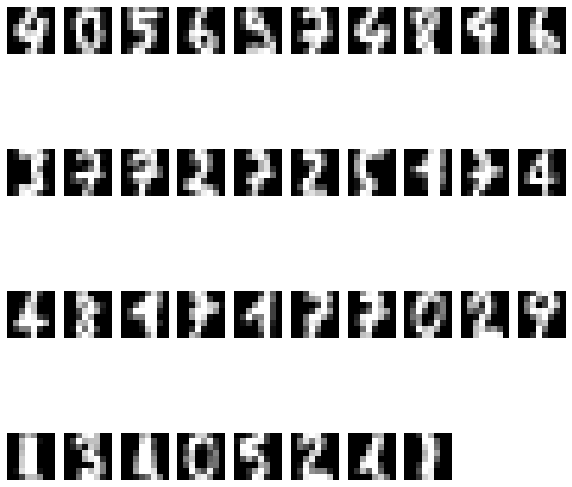

Cluster 3
31 elements


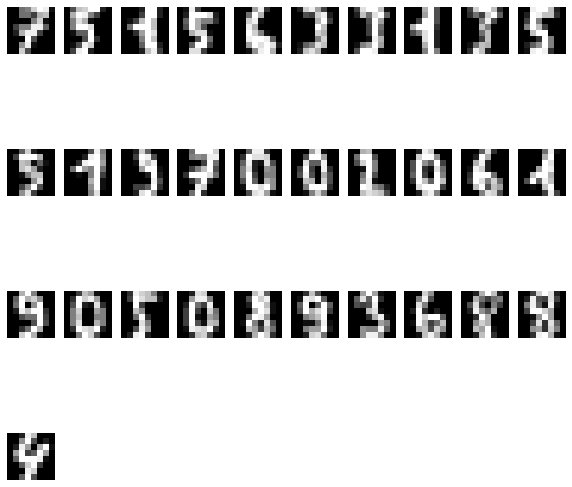

Cluster 4
33 elements


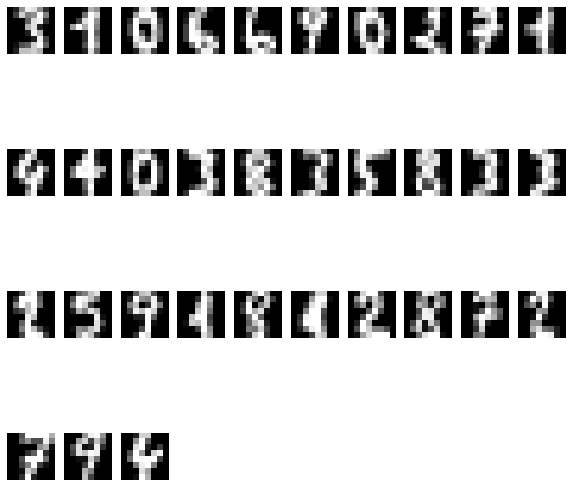

Cluster 5
39 elements


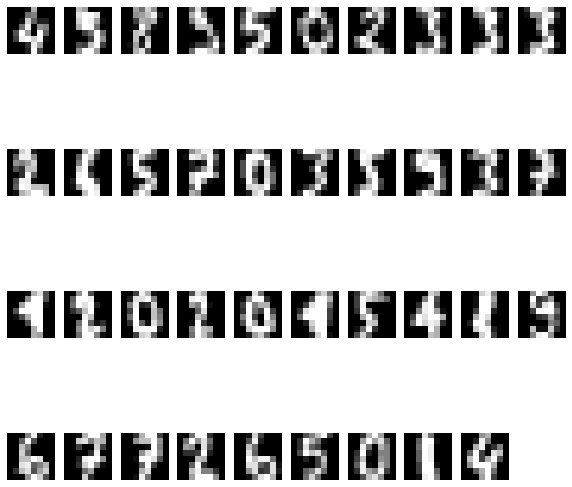

Cluster 6
40 elements


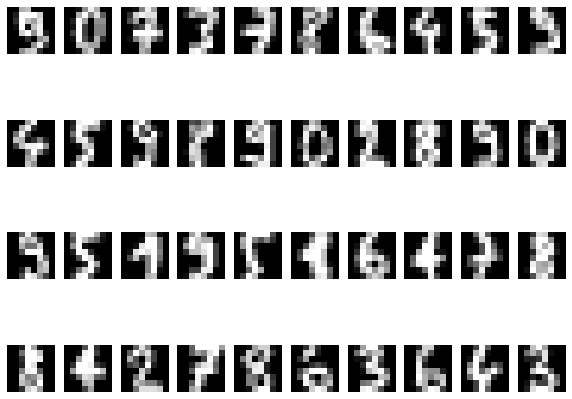

Cluster 7
20 elements


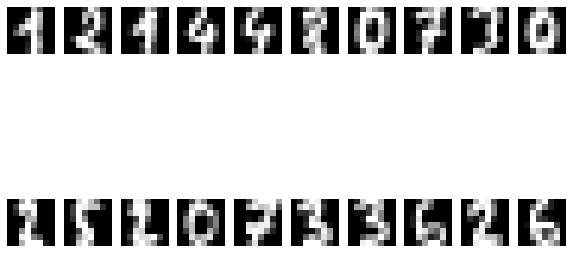

Cluster 8
41 elements


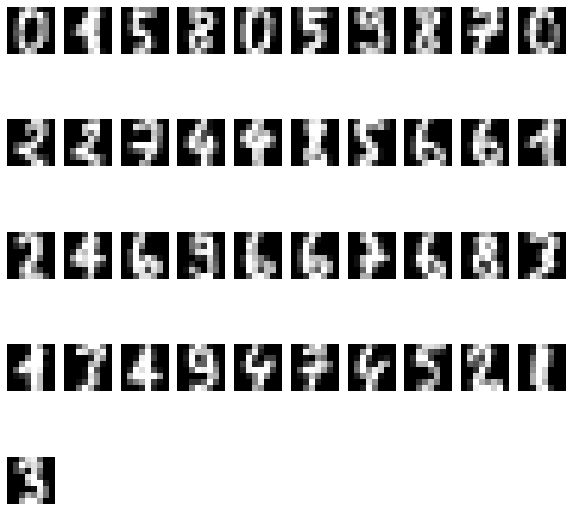

Cluster 9
27 elements


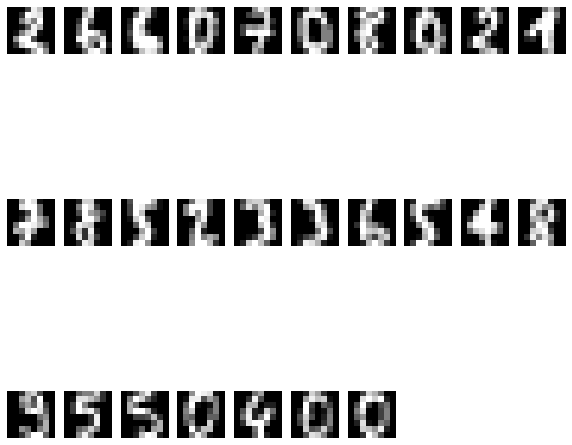

In [29]:
for i in range(10):
    row = np.where(y_pred==i)[0]
    num = row.shape[0]
    r = np.floor(num/10.)
    print("Cluster "+str(i))
    print(str(num)+" elements")
    plt.figure(figsize=(10,10))
    for k in range(0,num):
        plt.subplot(r+1,10,k+1)
        image = data[row[k],]
        image = image.reshape(8,8)
        plt.imshow(image,cmap='gray')
        plt.axis("off")
    plt.show()

<p style="font-size:15px;margin-left:200px;"><strong>ANALYSE DES CLUSTERS</strong><br><br></p>

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.05      0.07      0.06        28
           2       0.00      0.00      0.00        33
           3       0.35      0.32      0.34        34
           4       0.00      0.00      0.00        46
           5       0.31      0.26      0.28        47
           6       0.00      0.00      0.00        35
           7       0.25      0.15      0.19        34
           8       0.00      0.00      0.00        30
           9       0.44      0.30      0.36        40

    accuracy                           0.12       360
   macro avg       0.14      0.11      0.12       360
weighted avg       0.15      0.12      0.13       360



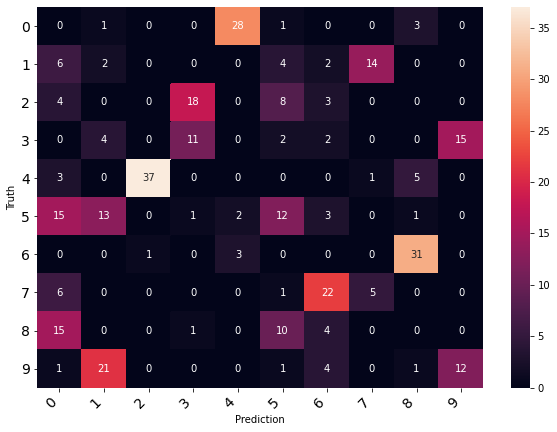

In [30]:
predictions = y_pred

cm = confusion_matrix(y_test,predictions)
print_confusion_matrix(cm,class_names=['0','1','2','3','4','5','6','7','8','9'])

print(classification_report(y_test,predictions))

<div style="font-size:15px">Nous remarquons qu'on a bien nos 10 clusters mais que la précision laisse à désirer, ce qui est à attendre du au fait que les modèles non supervisés n'ont pas une grande précision mais sont plus tôt utilisé conjointement à des modèles de Machine et de Deep Learning comme les Bagging Classifier, Isolation Forest afin d'améliorer les résultats de ce dernier.<br>
Les résultats peuvent aussi être expliqués par le fait que comme nous l'avons vu dans l'espace de projection les données sont assez proche les unes des autres ce qui fait la séparation en clusters n'est pas très précise.</div>

<p style="font-size:22px;"><strong>Partitionnement avec mélange gaussien, affichage et analyse des clusters</strong><br><br></p>
Comme nous l'avons vu la méthode de K-means est simple et facile à comprendre mais cette simplicité amène des problèmes dans son implémentation du fait qu'elle se base seulement sur la distance au centre pour assigner ces classes et n'a pas de notion de probabilité d'appartenance.

Ainsi nous tenterons une approche probabiliste du clustering, en utilisant des modèles de mélange gaussien (GMM). Nous verrons, d'un point de vue procédural, qu'il est très similaire aux k-means, mais leurs principes théoriques sont assez différents. GMM suppose que les données proviennent d'un mélange de distributions gaussiennes finies avec des paramètres inconnus.

Nous allons d'abord utiliser un ensemble de données conservé pour estimer le type de covariance (l'un des paramètres de la méthode).


<p style="font-size:15px;margin-left:200px;"><strong>PARTITIONNEMENT AVEC GAUSSIAN MIXTURE</strong><br><br></p>

In [31]:
from sklearn import mixture
from sklearn import metrics

In [32]:
# Define a heldout dataset to estimate covariance type
X_train_heldout, X_test_heldout, y_train_heldout, y_test_heldout = train_test_split(
        X_train, y_train,test_size=0.25, random_state=42)

for covariance_type in ['spherical','tied','diag','full']:
    gm=mixture.GaussianMixture(n_components=n_digits, covariance_type=covariance_type, random_state=42, n_init=5)
    gm.fit(X_train_heldout)
    y_pred=gm.predict(X_test_heldout)
    print("Adjusted rand score for covariance={}:{:.2}".format(covariance_type, metrics.adjusted_rand_score(y_test_heldout, 
                                                                                                            y_pred)))

Adjusted rand score for covariance=spherical:0.35
Adjusted rand score for covariance=tied:0.37
Adjusted rand score for covariance=diag:0.37
Adjusted rand score for covariance=full:0.38


In [33]:
gm = mixture.GaussianMixture(n_components=n_digits, covariance_type='full', random_state=42)
gm.fit(X_train)
predictions = gm.predict(X_test)

<p style="font-size:15px;margin-left:200px;"><strong>AFFICHAGE DES CLUSTERS</strong><br><br></p>

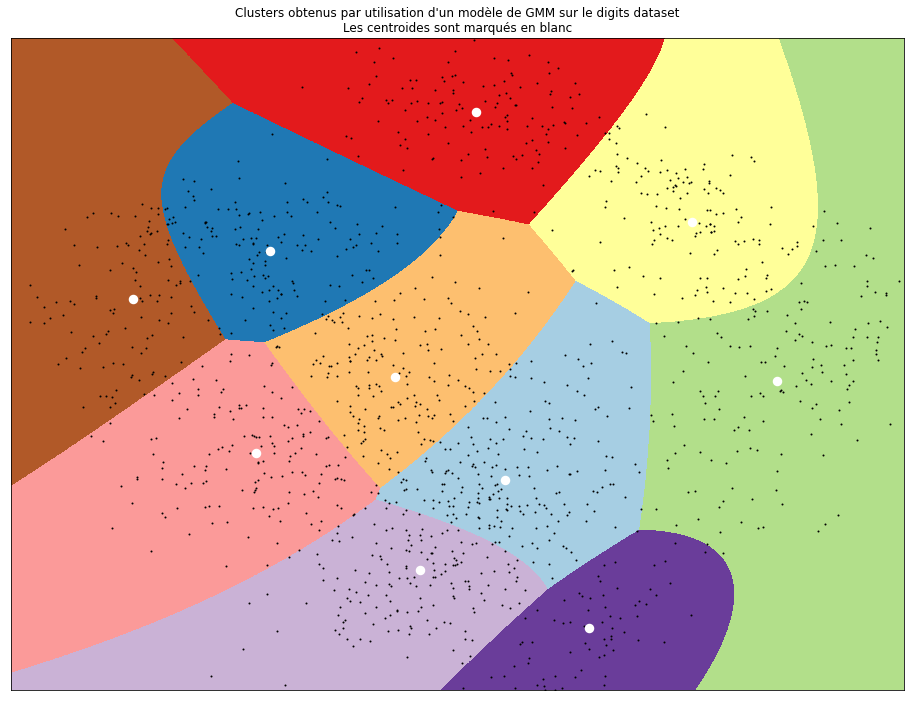

In [34]:
from sklearn import decomposition

h = .01    

x_min, x_max = X_train[:, 0].min() + 1, X_train[:, 0].max() - 1
y_min, y_max = X_train[:, 1].min() + 1, X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

gm.fit(X_train)
Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(16,12))
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')

plt.plot(X_train[:, 0], X_train[:, 1], 'k.', markersize=2)
centroids = gm.means_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

plt.title('Clusters obtenus par utilisation d\'un modèle de GMM sur le digits dataset\n''Les centroides sont marqués en blanc')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

# centroids = gm.means_
# plt.figure(figsize=(16,12))
# plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train)
# plt.scatter(centroids[:,0],centroids[:,1],color='r')
# plt.colorbar()
# plt.show()

Cluster 0
52 elements


<ipython-input-35-9bd19eb7eefe>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(r+1,10,k+1)


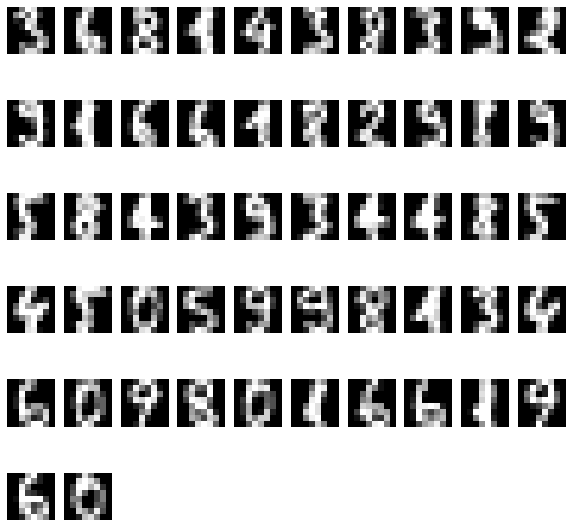

Cluster 1
45 elements


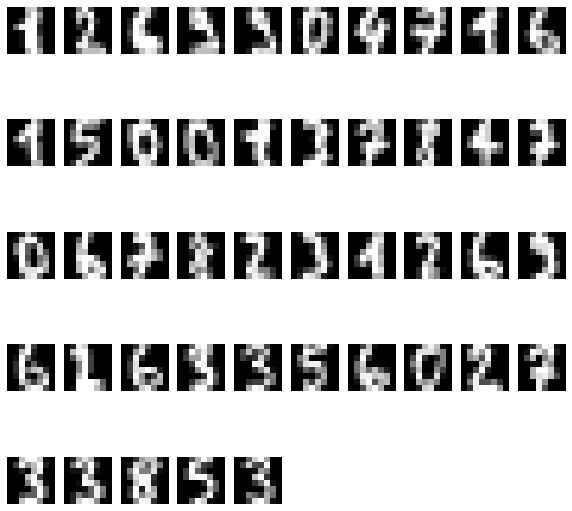

Cluster 2
45 elements


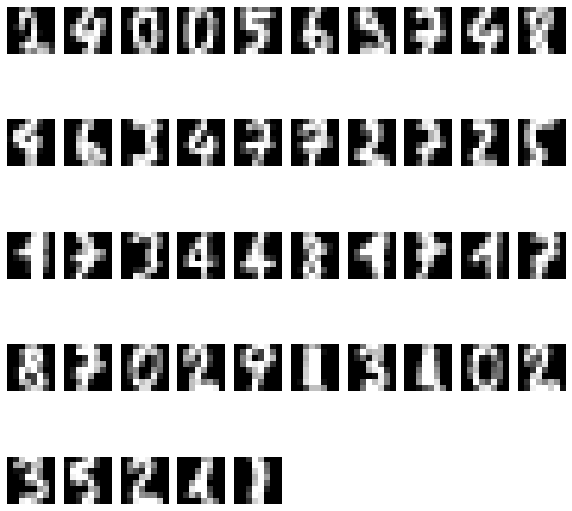

Cluster 3
34 elements


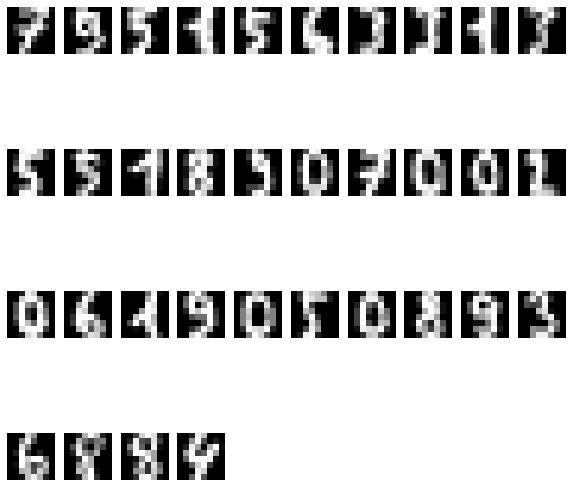

Cluster 4
32 elements


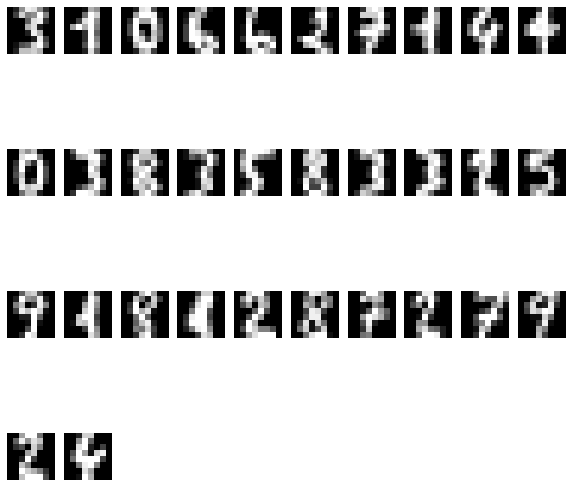

Cluster 5
41 elements


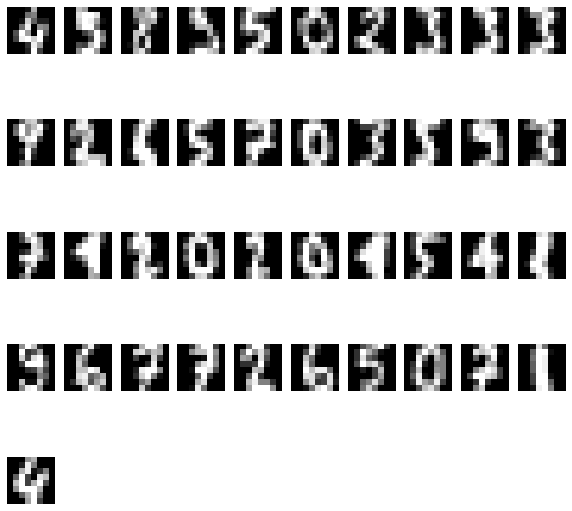

Cluster 6
41 elements


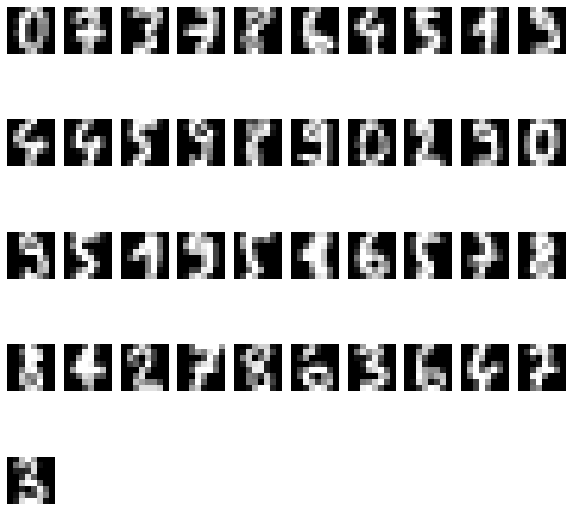

Cluster 7
10 elements


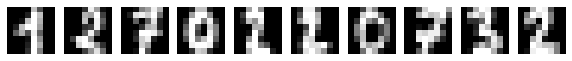

Cluster 8
37 elements


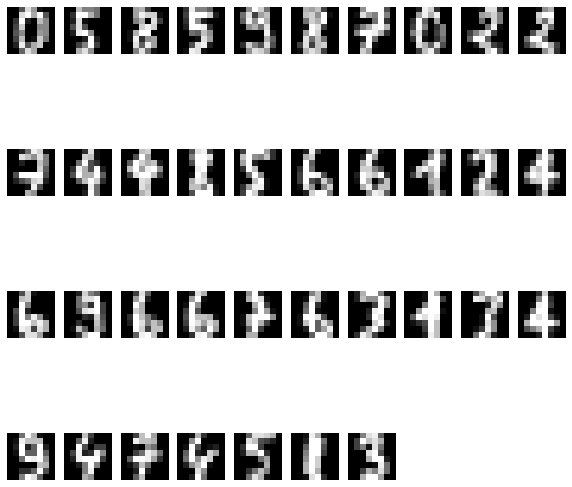

Cluster 9
23 elements


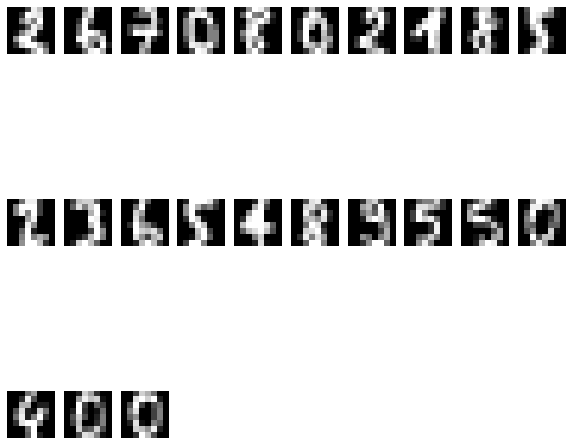

In [35]:
for i in range(10):
    row = np.where(predictions==i)[0]
    num = row.shape[0]
    r = np.floor(num/10.)
    print("Cluster "+str(i))
    print(str(num)+" elements")
    plt.figure(figsize=(10,10))
    for k in range(0,num):
        plt.subplot(r+1,10,k+1)
        image = data[row[k],]
        image = image.reshape(8,8)
        plt.imshow(image,cmap='gray')
        plt.axis("off")
    plt.show()

<p style="font-size:15px;margin-left:200px;"><strong>ANALYSE DES CLUSTERS</strong><br><br></p>

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.04      0.07      0.05        28
           2       0.00      0.00      0.00        33
           3       0.35      0.35      0.35        34
           4       0.00      0.00      0.00        46
           5       0.32      0.28      0.30        47
           6       0.00      0.00      0.00        35
           7       0.10      0.03      0.05        34
           8       0.00      0.00      0.00        30
           9       0.39      0.23      0.29        40

    accuracy                           0.10       360
   macro avg       0.12      0.10      0.10       360
weighted avg       0.13      0.10      0.11       360



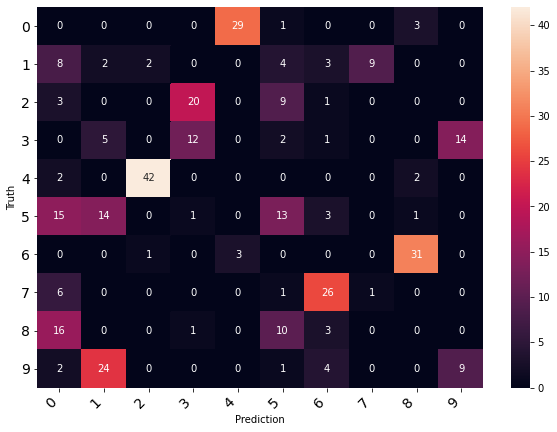

In [36]:
cm = confusion_matrix(y_test,predictions)
print_confusion_matrix(cm,class_names=['0','1','2','3','4','5','6','7','8','9'])

print(classification_report(y_test,predictions))

### Conclusions et quelques observations

In [37]:
import numpy as np
import pandas as pd
import time
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [38]:
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [39]:
class clust():
    def _load_data(self, sklearn_load_ds):
        data = sklearn_load_ds
        X = pd.DataFrame(data.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, data.target, test_size=0.3, random_state=42)
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    @timeit
    def classify(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))

    @timeit
    def Kmeans(self, output='add'):
        n_clusters = len(np.unique(self.y_train))
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)
        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

 #####  Data clustering avec les clusters de KMeans sans utiliser le SVC

In [40]:
clust(load_digits()).Kmeans(output='replace').classify(model=SVC())

'Kmeans'  326.52 ms
Accuracy: 0.7833333333333333
'classify'  106.42 ms


##### Data clustering en utilisant uniquement le classifier

In [41]:
clust(load_digits()).classify()

Accuracy: 0.9648148148148148
'classify'  317.87 ms


C:\Users\Massamba Sene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Data clustering en combinant les deux

In [42]:
clust(load_digits()).Kmeans(output='add').classify()

'Kmeans'  267.35 ms
Accuracy: 0.9666666666666667
'classify'  262.42 ms


C:\Users\Massamba Sene\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Le clustering, en plus d'être un apprentissage automatique non supervisé, peut également être utilisé pour créer des clusters en tant que fonctionnalités permettant d'améliorer les modèles de classification. À eux seuls, ils ne suffisent pas pour la classification, comme le montrent les résultats. Mais lorsqu'elles sont utilisées comme fonctionnalités, elles améliorent la précision du modèle